<a href="https://colab.research.google.com/github/ericchu2595/911_EmergencyCall_Study/blob/main/DecisionTrees_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Get the Data

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression/Logistic Regression/data/kyphosis.csv')

In [27]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


EDA

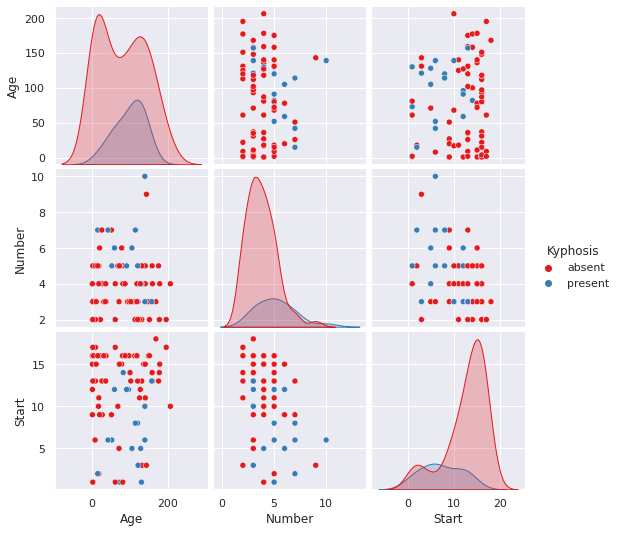

In [28]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Kyphosis', axis=1)
y= df['Kyphosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Decision Trees
We'll start just by taining a single decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Prediction and Evaluation
Let's evaluate our decision tree.

In [35]:
predictions = dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.74      0.78      0.76        18
     present       0.33      0.29      0.31         7

    accuracy                           0.64        25
   macro avg       0.54      0.53      0.53        25
weighted avg       0.62      0.64      0.63        25



In [38]:
print(confusion_matrix(y_test, predictions))

[[14  4]
 [ 5  2]]


In [39]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

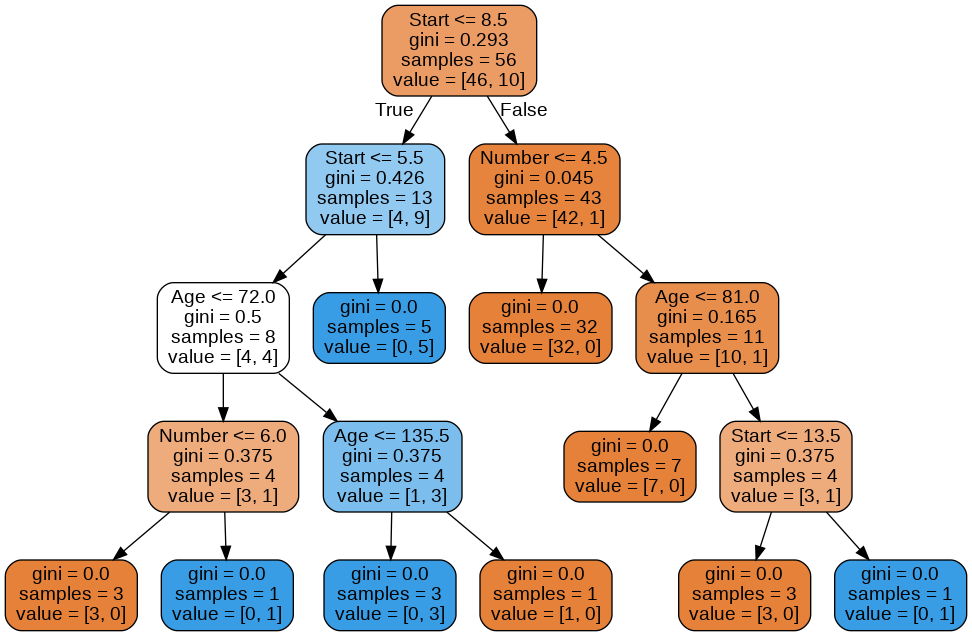

In [40]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())